In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'EUR=X'
numbers_in_currency = 'EUR'
share_name = 'TKA.DE'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares
0,2001-03-31,9402,-7769,1633,50,890,6109,7128,15946,0,...,36238,2976,0,0,16312,9656,27591,775,-480,514.49
1,2001-06-30,9598,-7908,1690,272,1070,6274,7244,16522,0,...,36660,3109,0,0,16649,9429,27685,177,-491,514.49
2,2001-09-30,9646,-7755,1891,93,1234,5721,6525,15141,0,...,34649,3248,0,0,16616,7665,25863,1760,-643,514.49
3,2001-12-31,8339,-6951,1388,18,1053,5423,6753,15097,0,...,34804,2783,0,0,16102,8243,25865,-270,-390,514.49
4,2002-03-31,9015,-7481,1534,70,834,5690,6821,15158,0,...,34835,3034,0,0,16438,8182,26128,305,-356,514.49


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
87,2022-12-31,2023-02-11,622.53,9018,-7851,1167,98,7160,6379,9208,...,1856,36104,4052,0,1162,12374,2750,22146,-137,-224
88,2023-03-31,2023-04-21,622.53,10107,-9193,914,-202,5835,7384,8468,...,1872,35132,4344,0,1697,13440,1252,21651,206,-415
89,2023-06-30,2023-07-21,622.53,9598,-8397,1201,107,6163,7165,8131,...,1853,34967,4449,0,1696,13303,1240,21536,599,-267
90,2023-09-30,2023-10-21,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,1828,33291,4270,0,1712,13117,1313,21452,1396,-851
91,2023-12-31,2024-02-11,622.53,8181,-7383,798,-304,6629,5767,7986,...,1784,32068,3926,0,1653,12420,1276,21290,-424,-300


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

EUR=X: Data doesn't exist for startDate = 978220800, endDate = 985993200
/Users/zsolt.nagy/Desktop/projects/Economy/valueinvesting/utils.py:52: RuntimeWarning: Mean of empty slice.
  result_series.append(data[columns].values.mean())
/Users/zsolt.nagy/Desktop/projects/Economy/venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
EUR=X: Data doesn't exist for startDate = 986079600, endDate = 993855600
/Users/zsolt.nagy/Desktop/projects/Economy/valueinvesting/utils.py:52: RuntimeWarning: Mean of empty slice.
  result_series.append(data[columns].values.mean())
/Users/zsolt.nagy/Desktop/projects/Economy/venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
EUR=X: Data doesn't exist for startDate = 994028400, endDate = 1001804400
/Users/zsolt.nagy/Desktop/projects/Economy/valueinvesting/

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
87,2022-12-31,2023-02-11,622.53,9018,-7851,1167,98,7160,6379,9208,...,36104,4052,0,1162,12374,2750,22146,-137,-224,0.980663
88,2023-03-31,2023-04-21,622.53,10107,-9193,914,-202,5835,7384,8468,...,35132,4344,0,1697,13440,1252,21651,206,-415,0.932003
89,2023-06-30,2023-07-21,622.53,9598,-8397,1201,107,6163,7165,8131,...,34967,4449,0,1696,13303,1240,21536,599,-267,0.918362
90,2023-09-30,2023-10-21,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,33291,4270,0,1712,13117,1313,21452,1396,-851,0.918837
91,2023-12-31,2024-02-11,622.53,8181,-7383,798,-304,6629,5767,7986,...,32068,3926,0,1653,12420,1276,21290,-424,-300,0.929674


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
87,2022-12-31,2023-02-11,622.53,9018,-7851,1167,98,7160,6379,9208,...,36104,4052,0,1162,12374,2750,22146,-137,-224,0.980663
88,2023-03-31,2023-04-21,622.53,10107,-9193,914,-202,5835,7384,8468,...,35132,4344,0,1697,13440,1252,21651,206,-415,0.932003
89,2023-06-30,2023-07-21,622.53,9598,-8397,1201,107,6163,7165,8131,...,34967,4449,0,1696,13303,1240,21536,599,-267,0.918362
90,2023-09-30,2023-10-21,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,33291,4270,0,1712,13117,1313,21452,1396,-851,0.918837
91,2023-12-31,2024-02-11,622.53,8181,-7383,798,-304,6629,5767,7986,...,32068,3926,0,1653,12420,1276,21290,-424,-300,0.929674


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2004-02-16,11.621695,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,0.250584,0.749416,6.543811,9.658915,34.841004,4.582414,0.177015,0.01297,0.014218,0.056738
1,2004-02-23,11.323889,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,0.250584,0.749416,6.543811,9.658915,34.841004,4.582414,0.177015,0.01297,0.014218,0.056738
2,2004-03-01,11.592643,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,0.250584,0.749416,6.543811,9.658915,34.841004,4.582414,0.177015,0.01297,0.014218,0.056738
3,2004-03-08,10.721015,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,0.250584,0.749416,6.543811,9.658915,34.841004,4.582414,0.177015,0.01297,0.014218,0.056738
4,2004-03-15,10.503108,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,0.250584,0.749416,6.543811,9.658915,34.841004,4.582414,0.177015,0.01297,0.014218,0.056738


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2004-02-16,11.621695,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,4.582414,0.177015,0.01297,0.014218,0.056738,13.840846,0.785296,0.179514,0.834462,5.338612
1,2004-02-23,11.323889,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,4.582414,0.177015,0.01297,0.014218,0.056738,13.486175,0.765173,0.174914,0.829862,5.201810
2,2004-03-01,11.592643,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,4.582414,0.177015,0.01297,0.014218,0.056738,13.806247,0.783333,0.179065,0.834013,5.325267
3,2004-03-08,10.721015,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,4.582414,0.177015,0.01297,0.014218,0.056738,12.768183,0.724436,0.165602,0.820549,4.924871
4,2004-03-15,10.503108,2003-12-31,8327.0,0.839666,14.799121,514.49,1120.0,2.176913,956.0,...,4.582414,0.177015,0.01297,0.014218,0.056738,12.508667,0.709712,0.162236,0.817183,4.824771


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

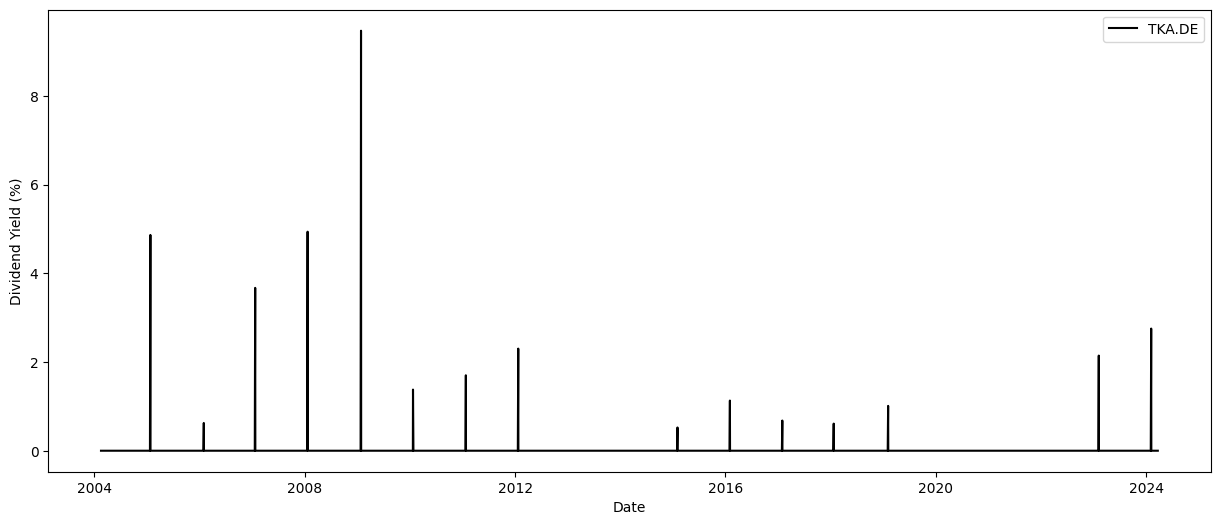

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   -0.592779
share_price      1.000000
Name: share_price, dtype: float64


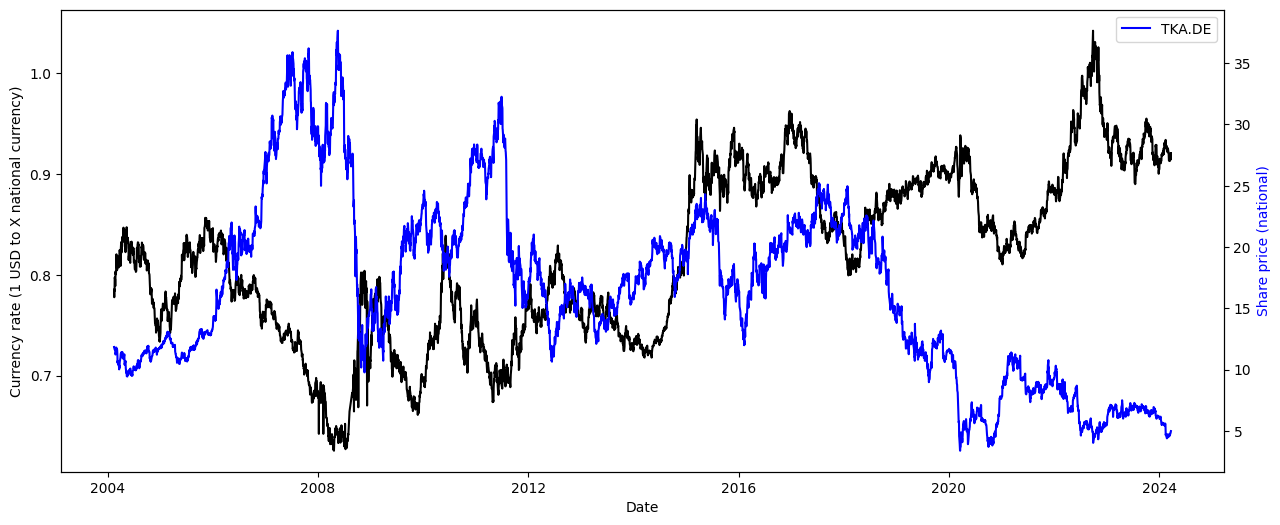

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

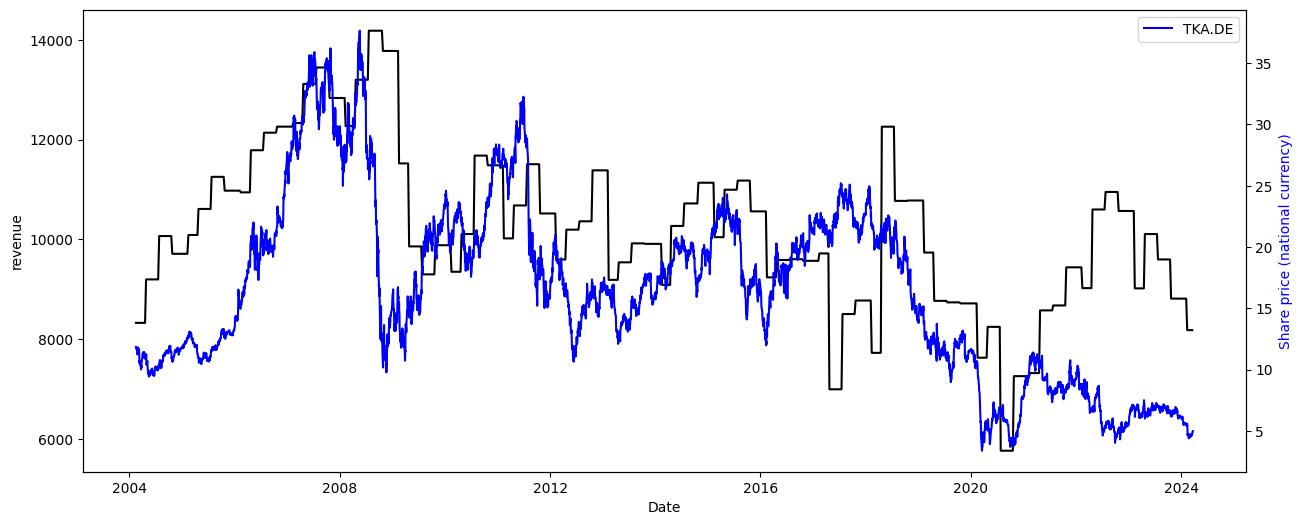

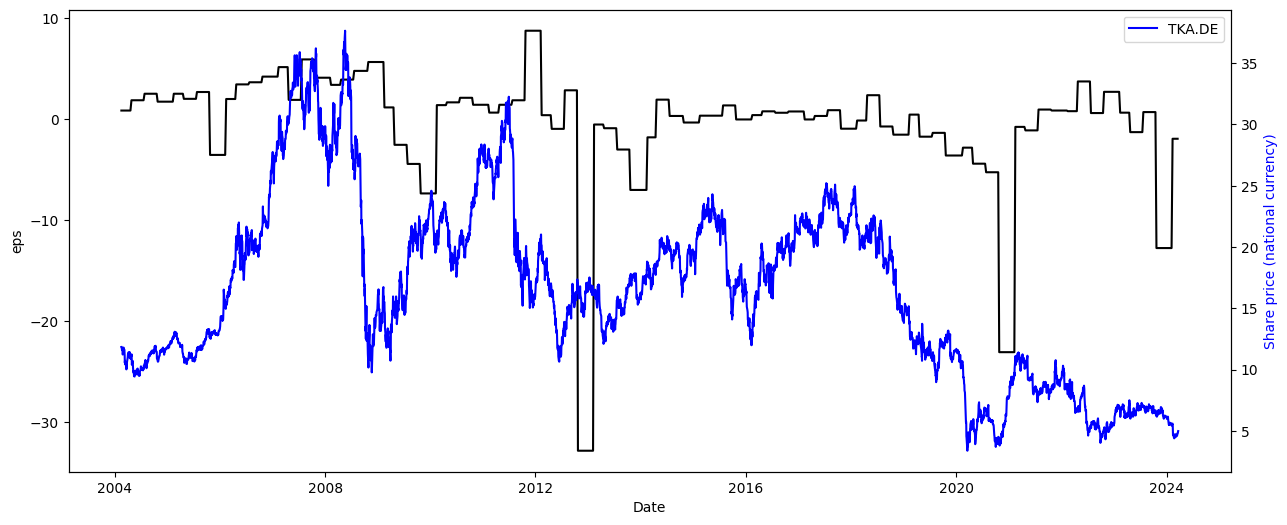

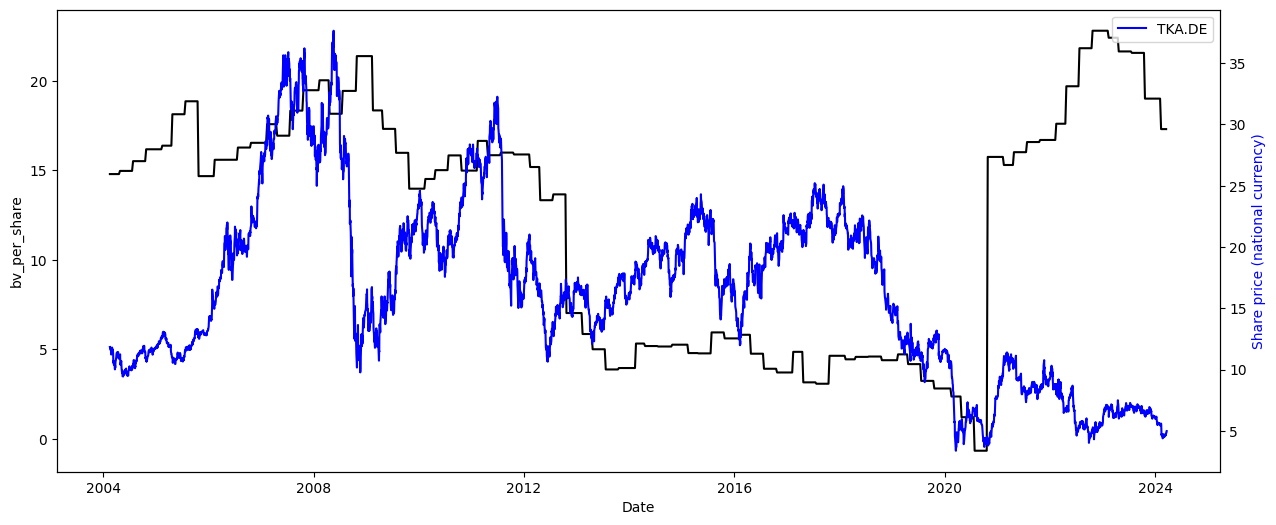

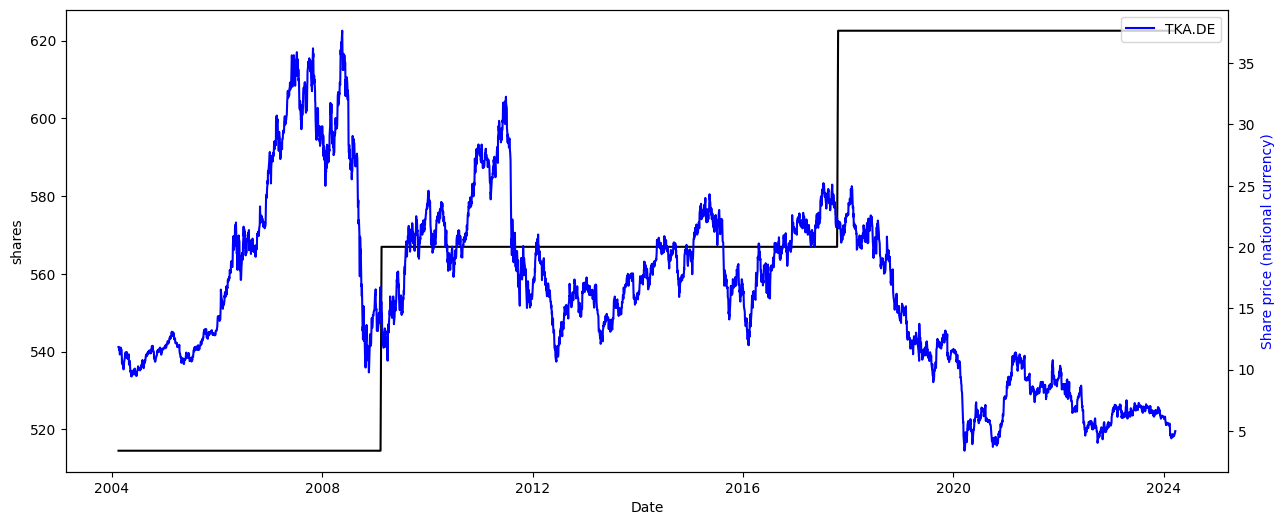

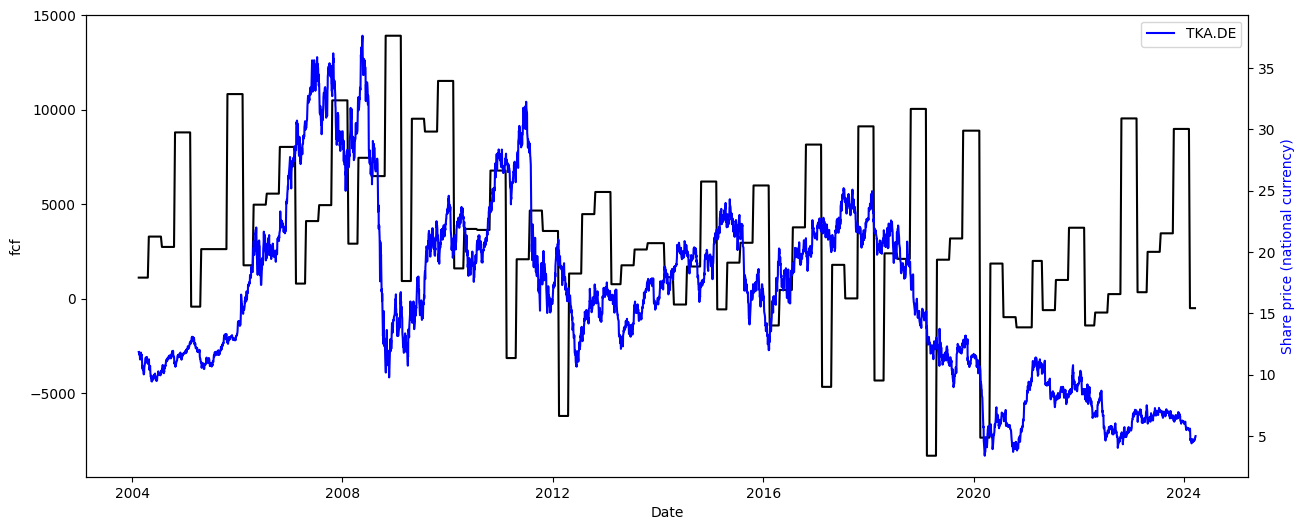

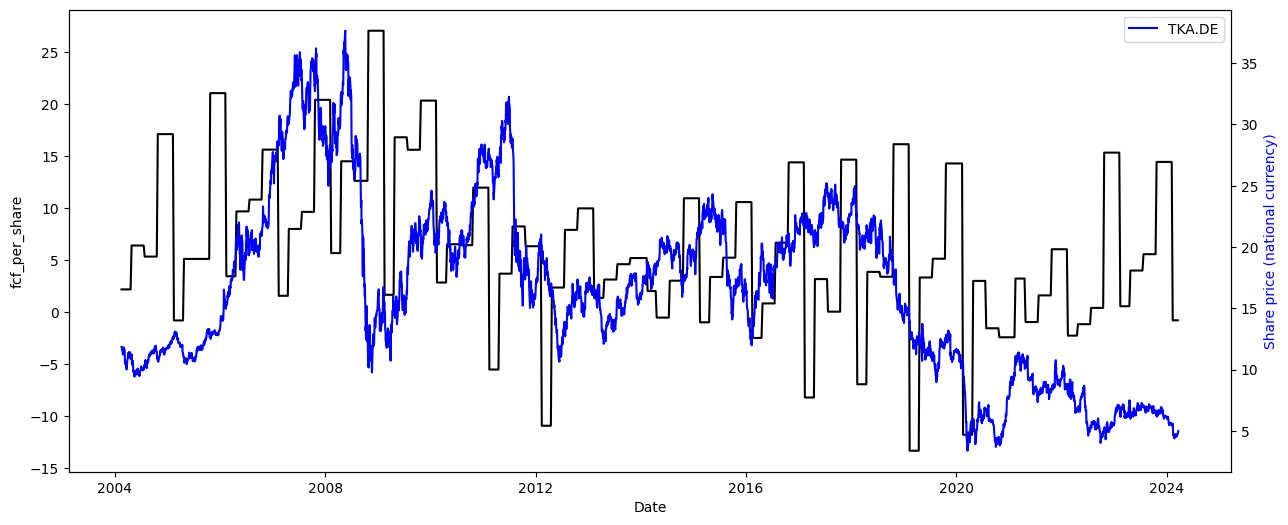

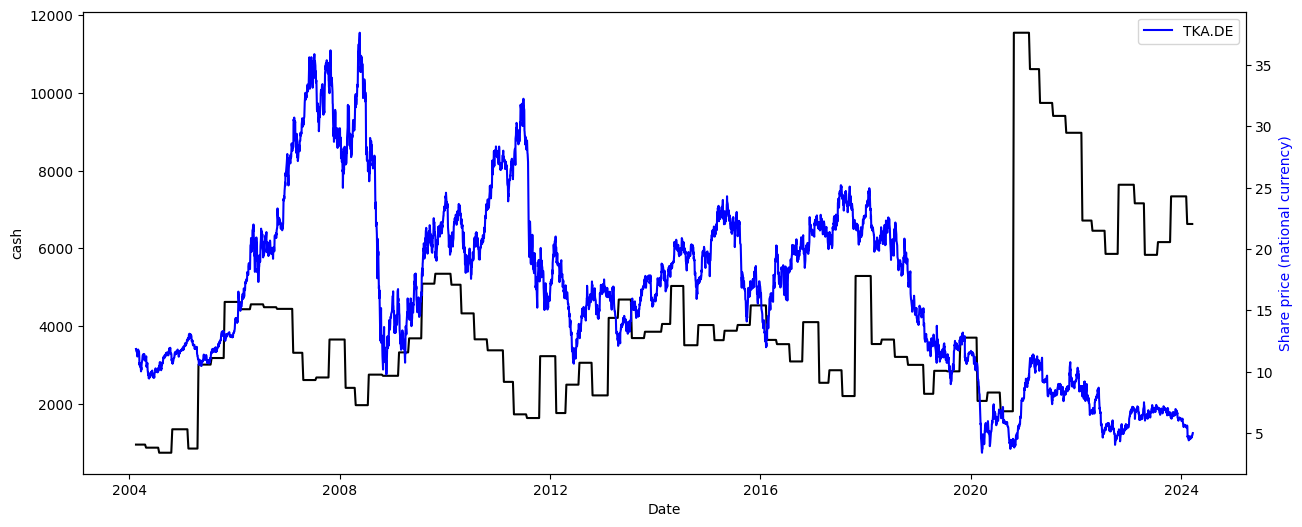

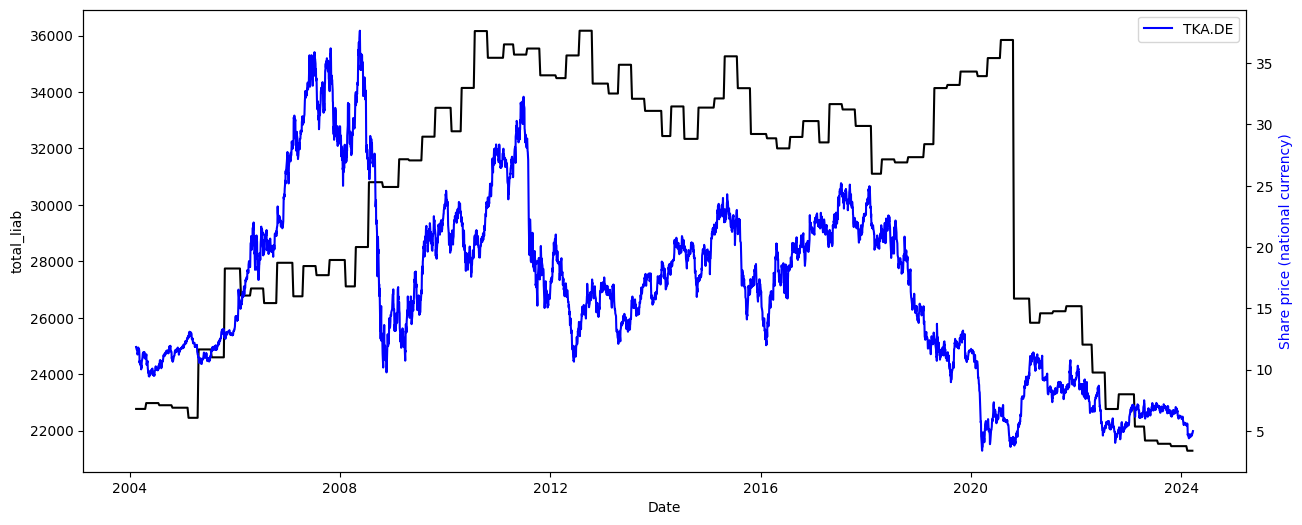

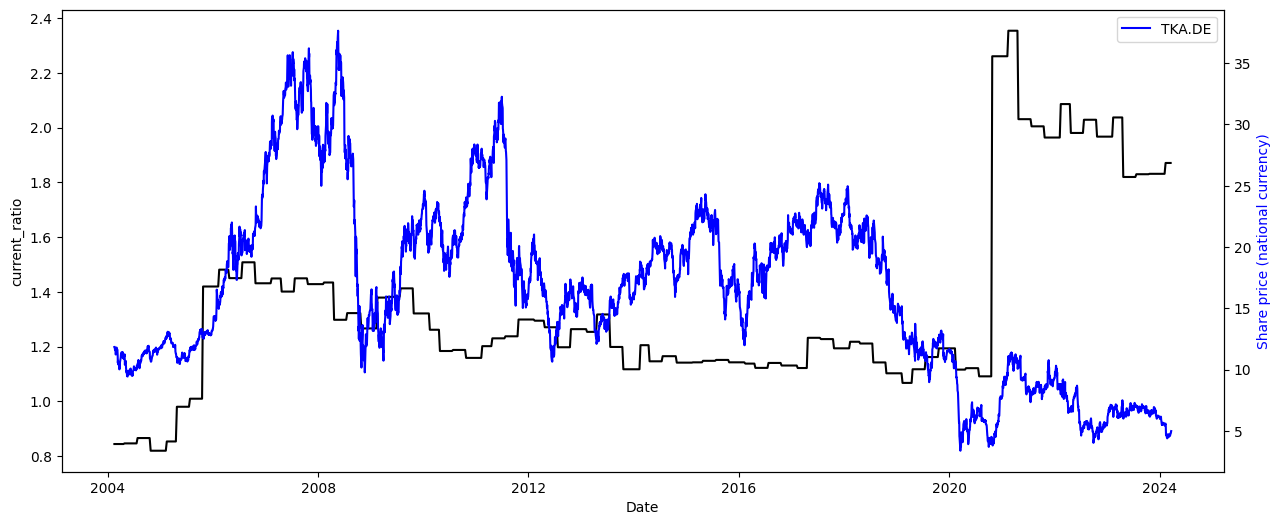

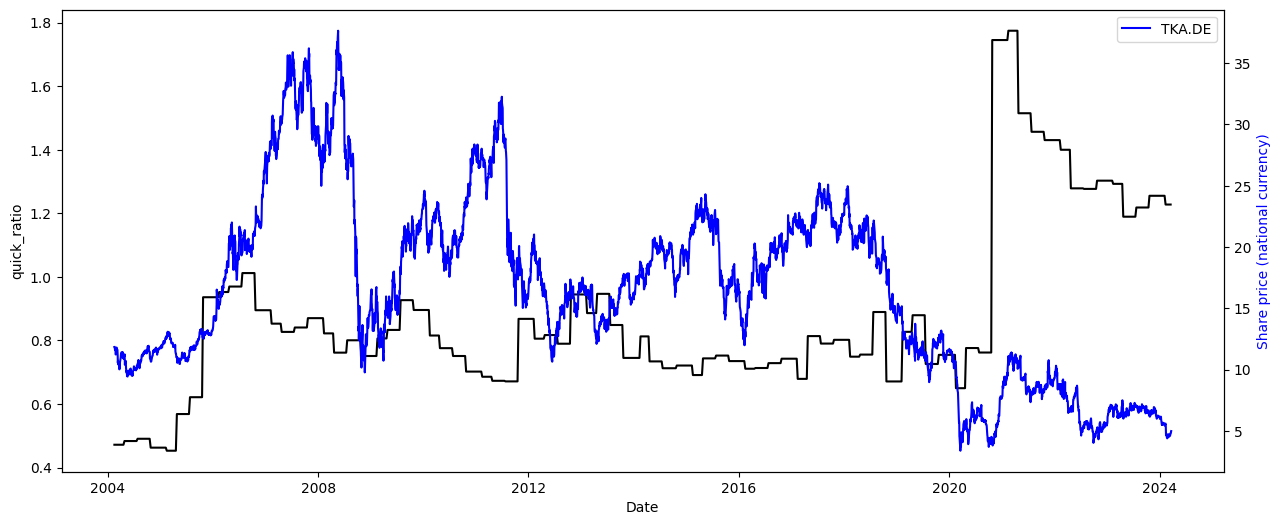

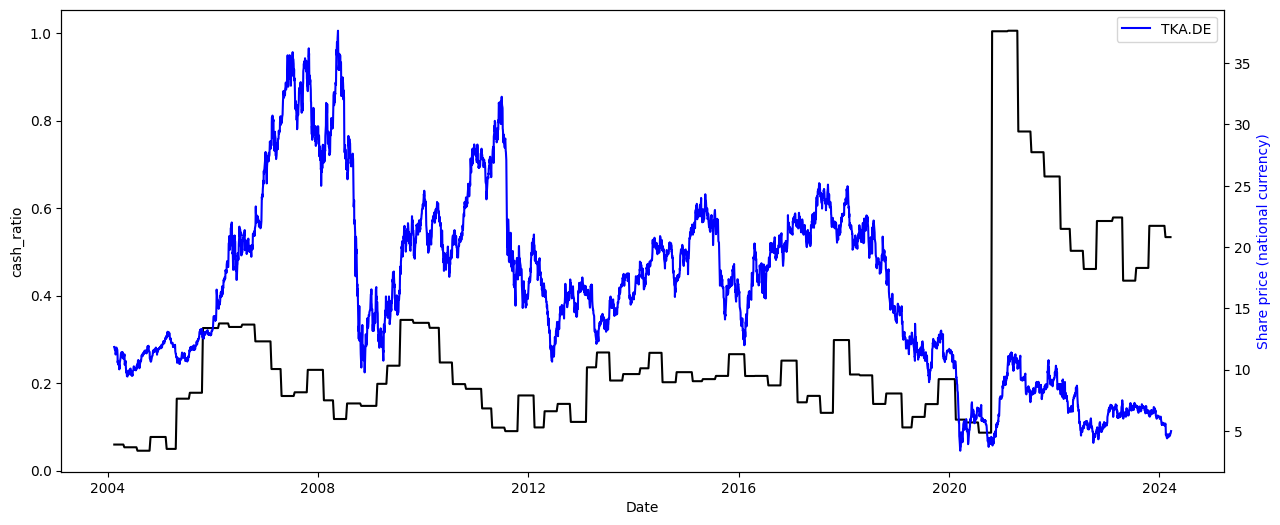

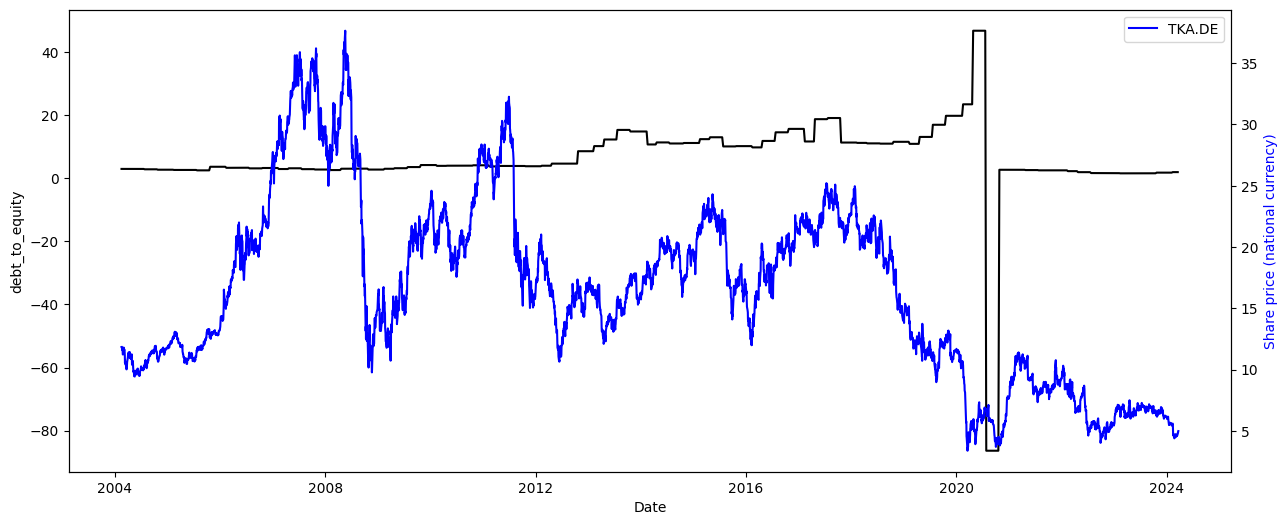

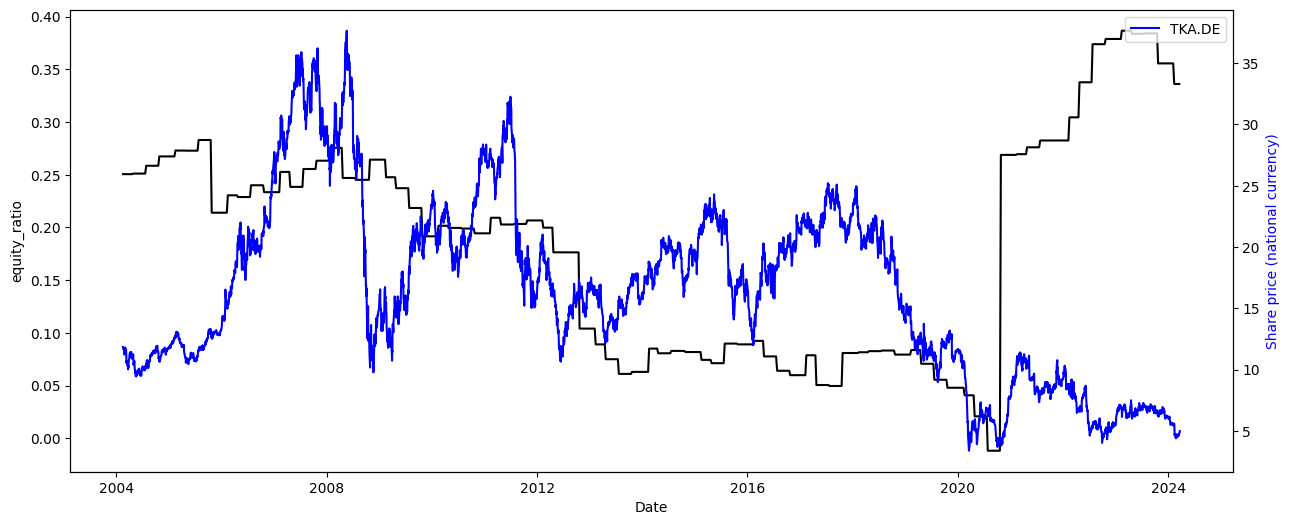

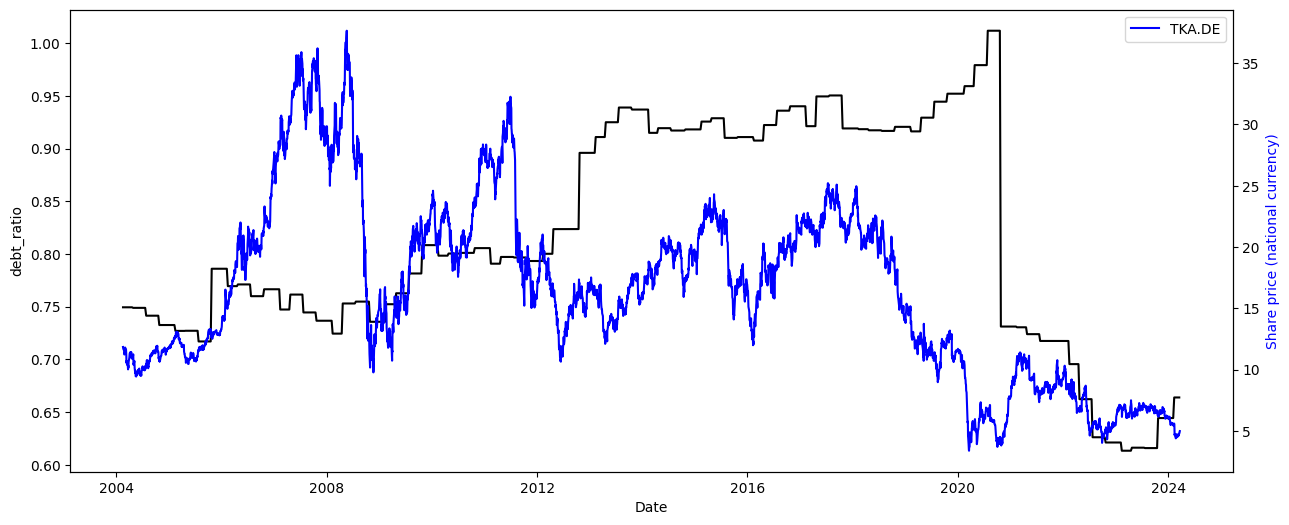

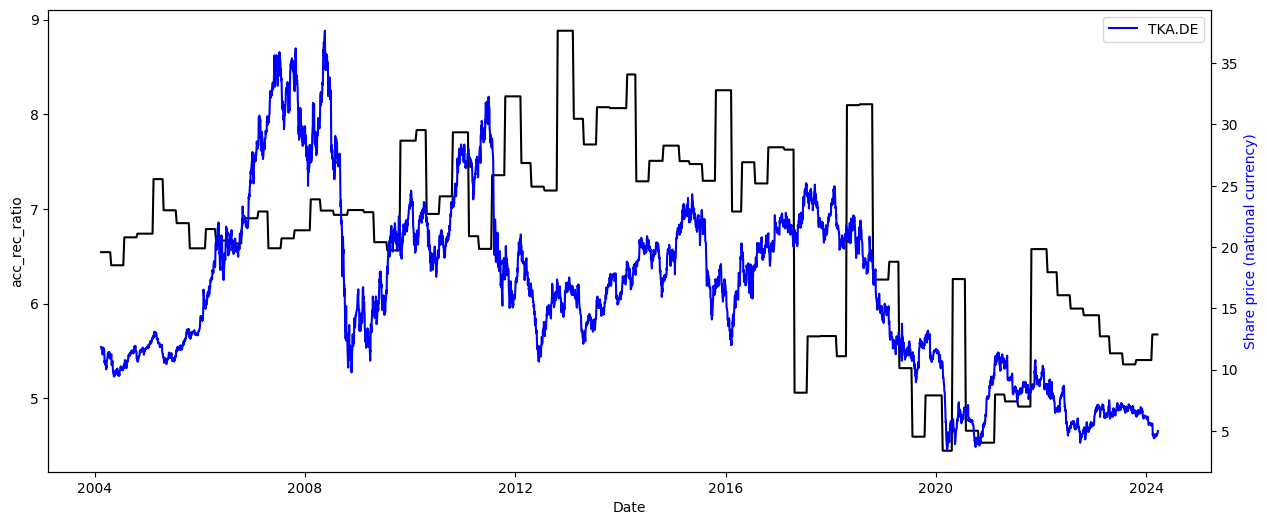

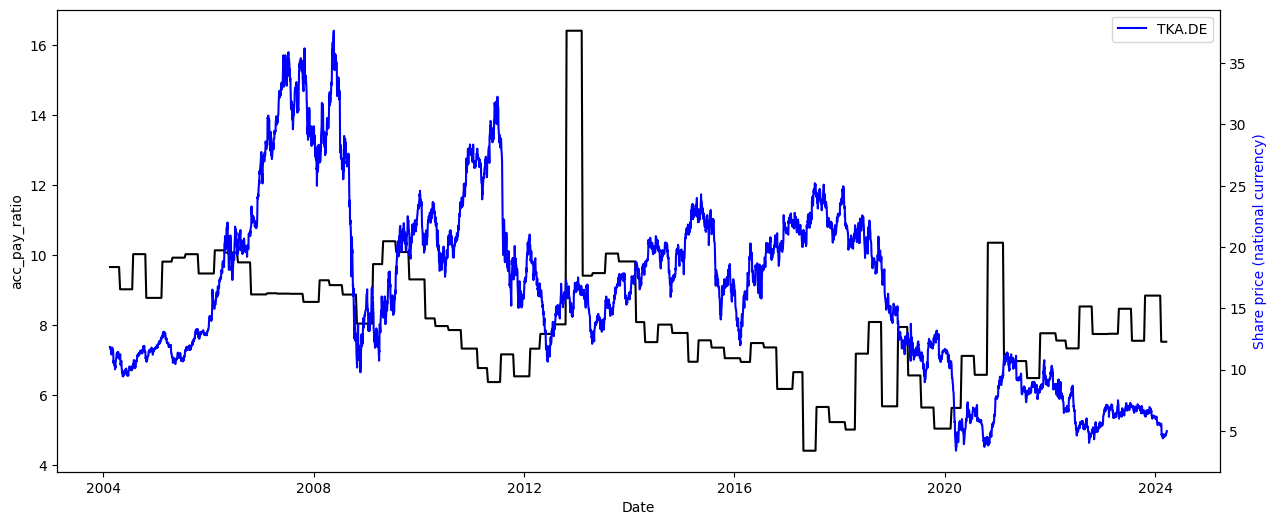

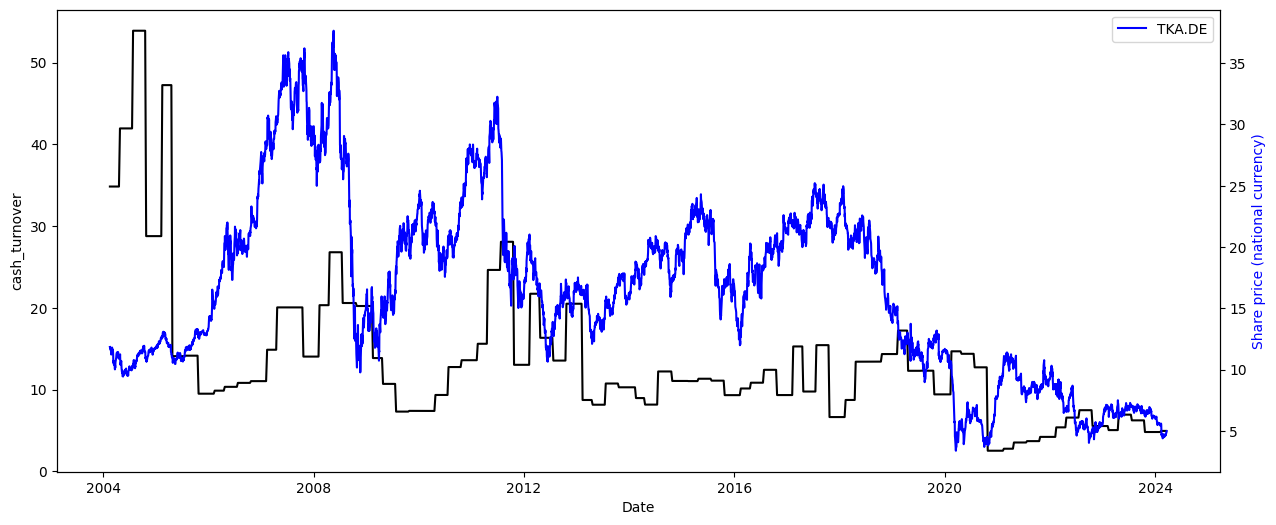

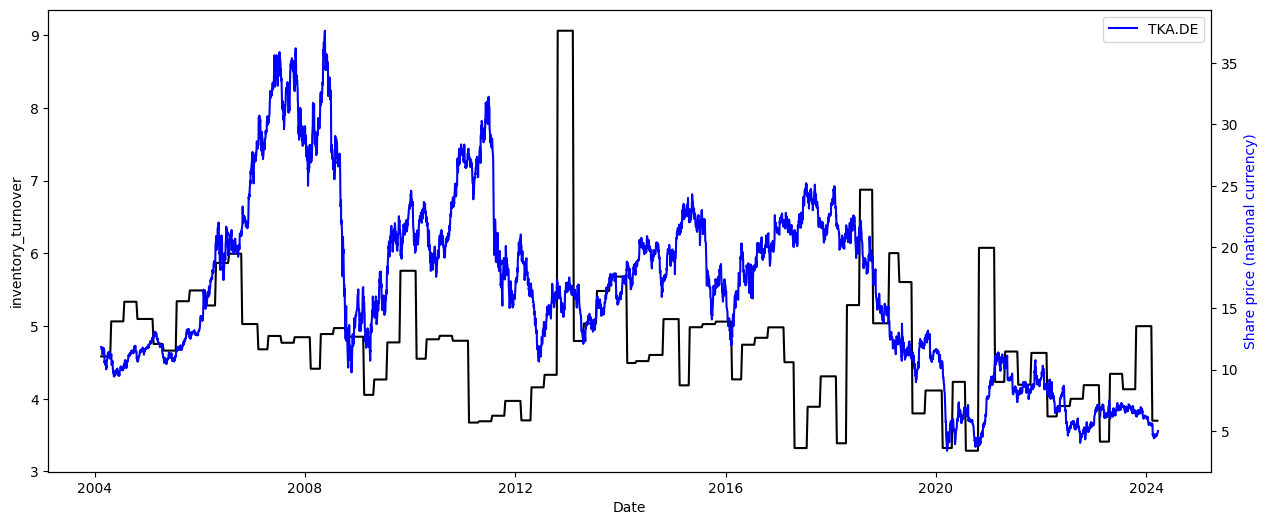

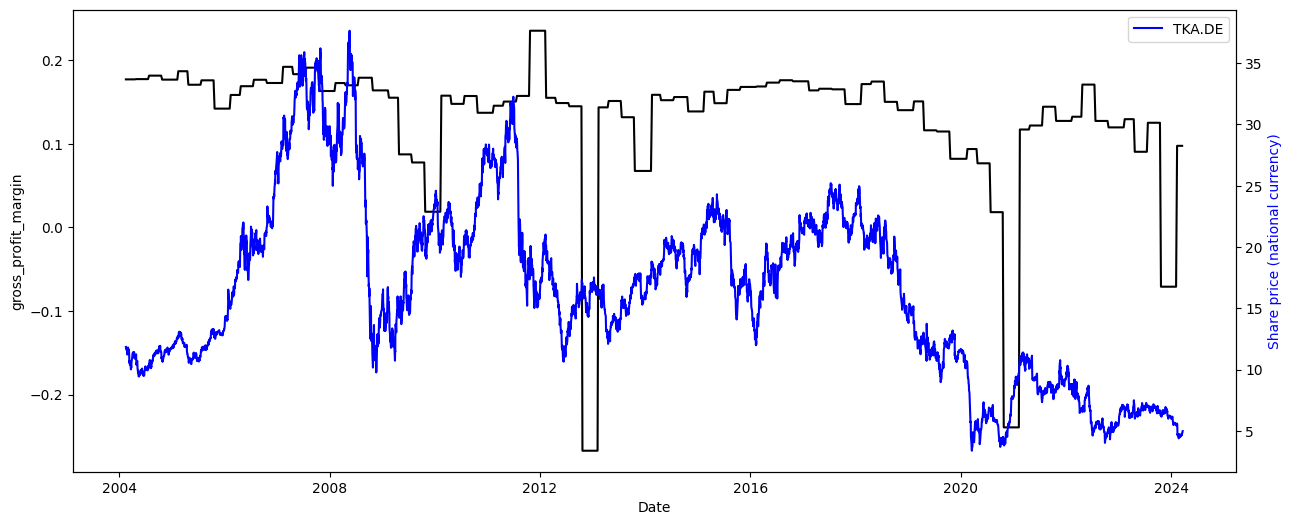

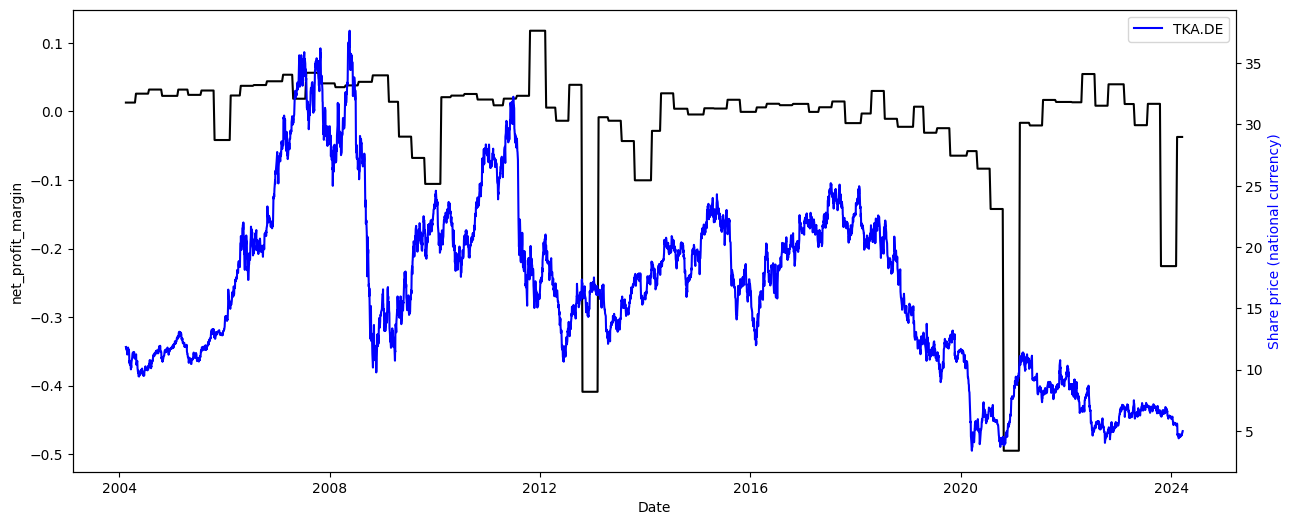

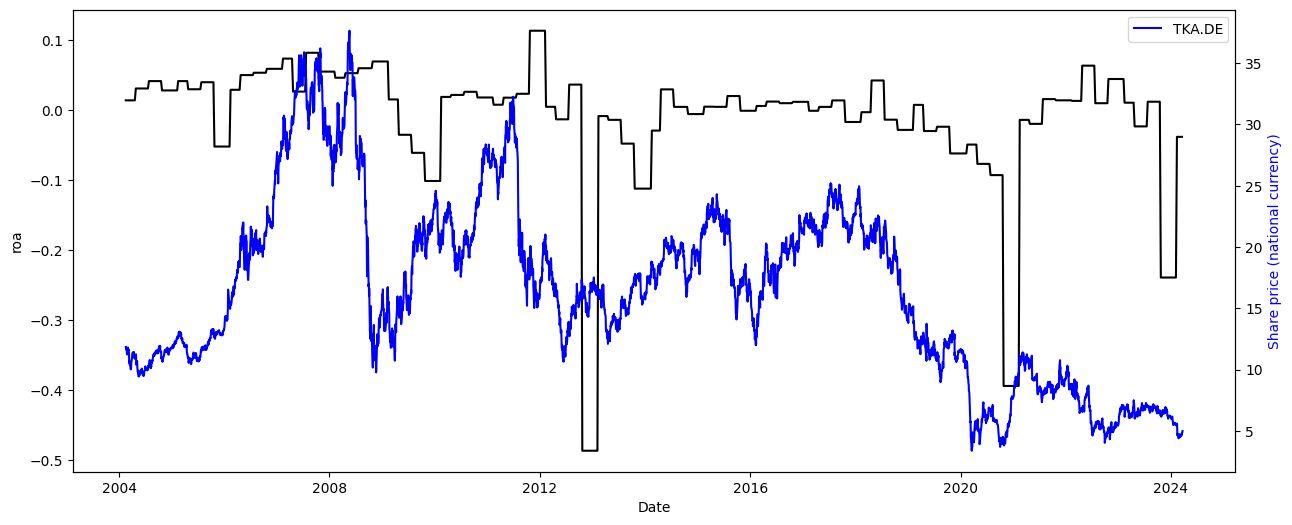

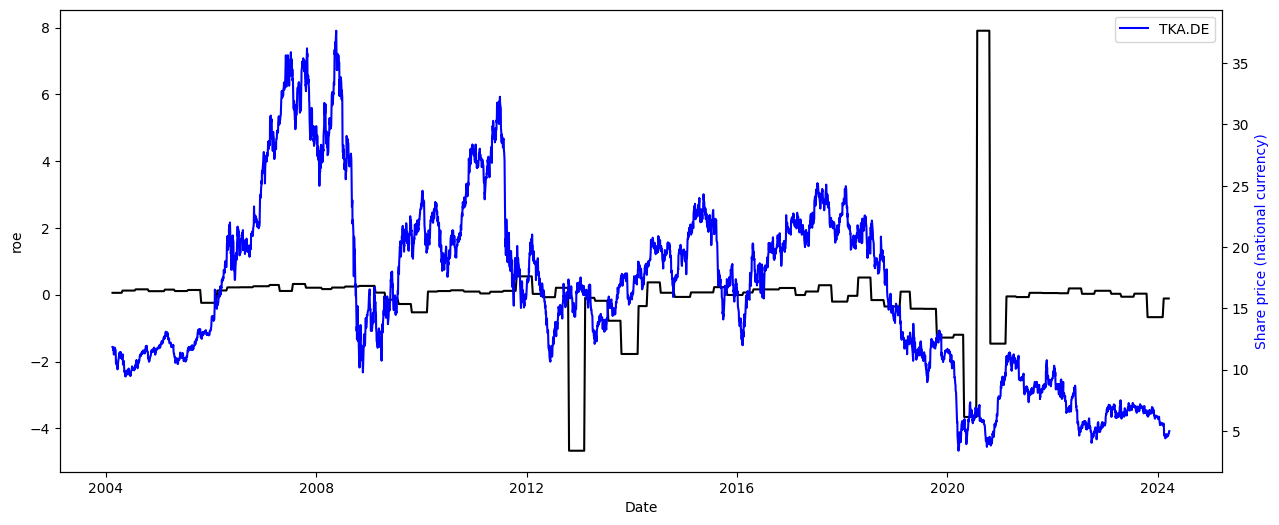

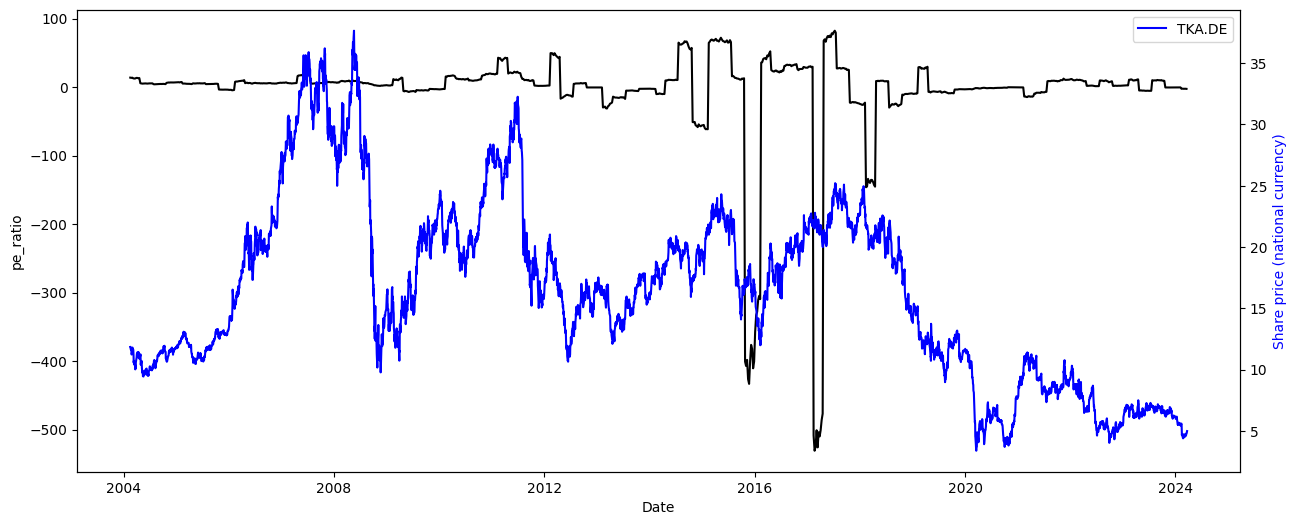

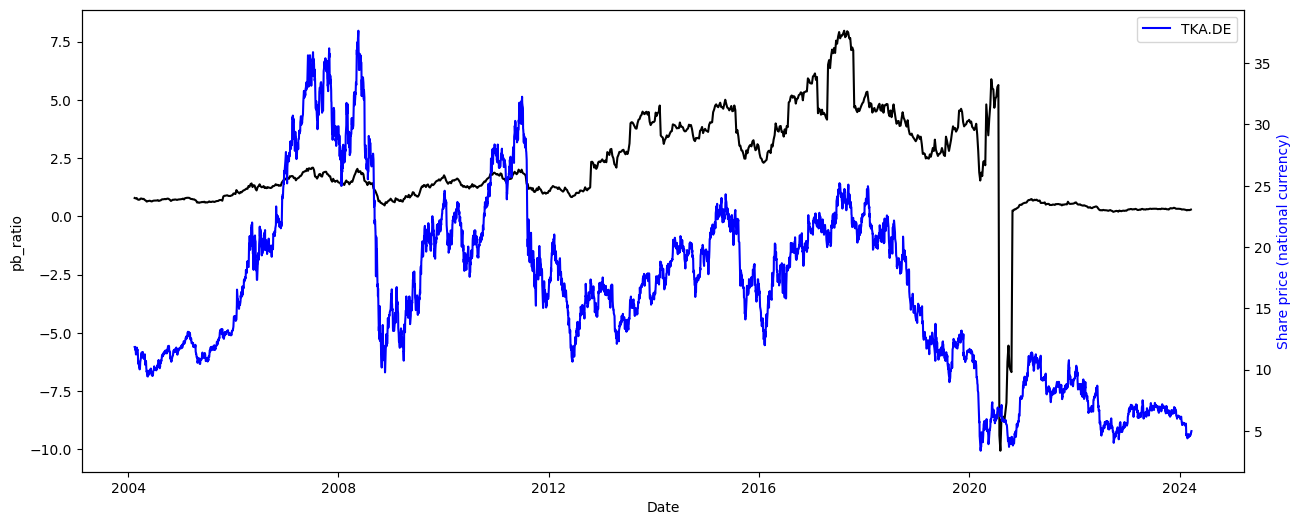

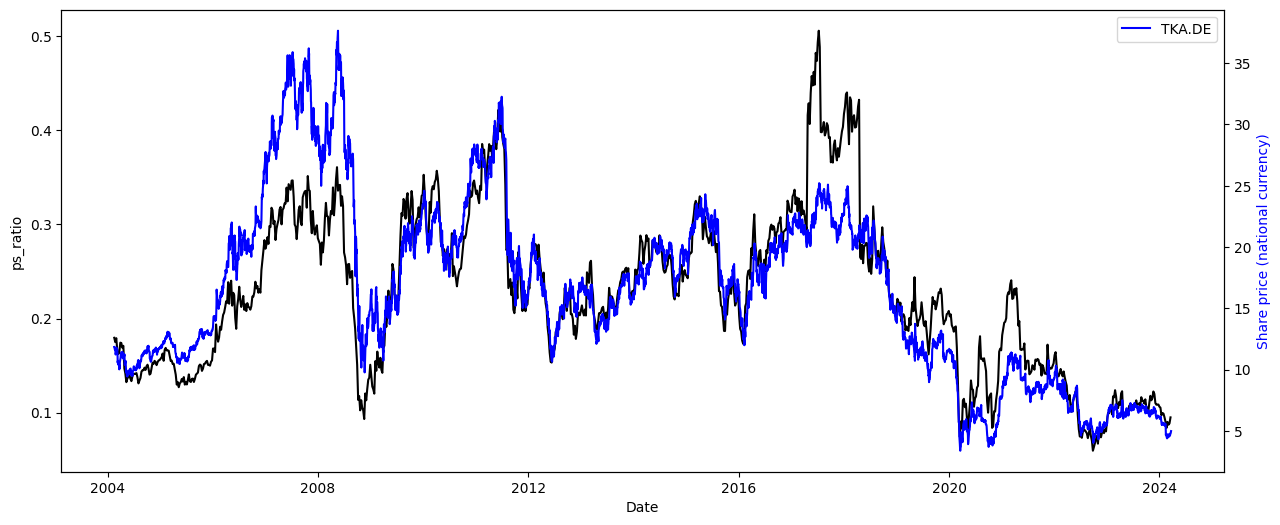

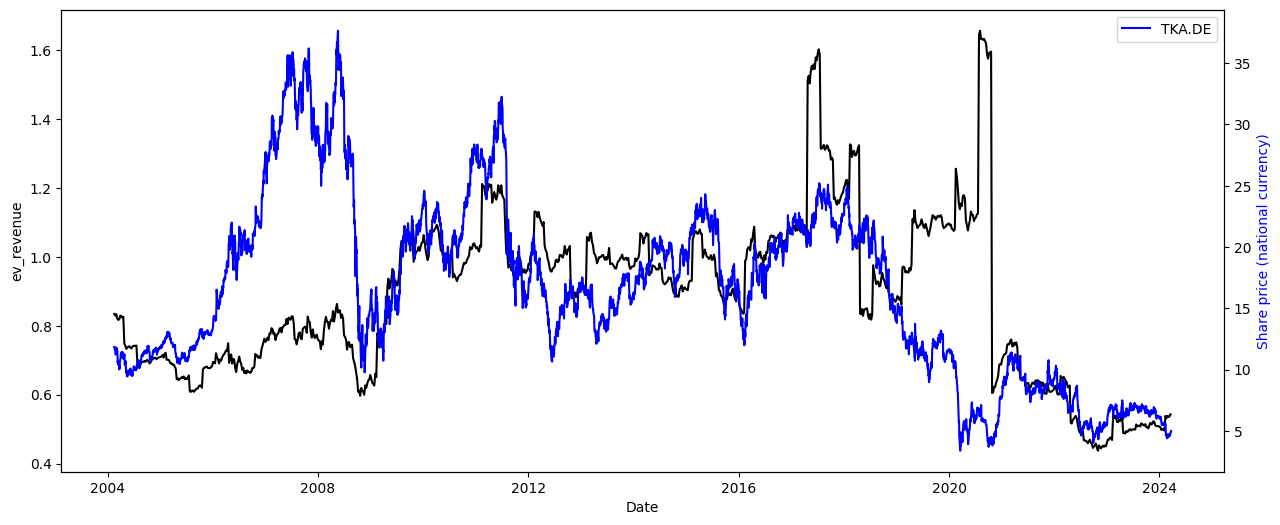

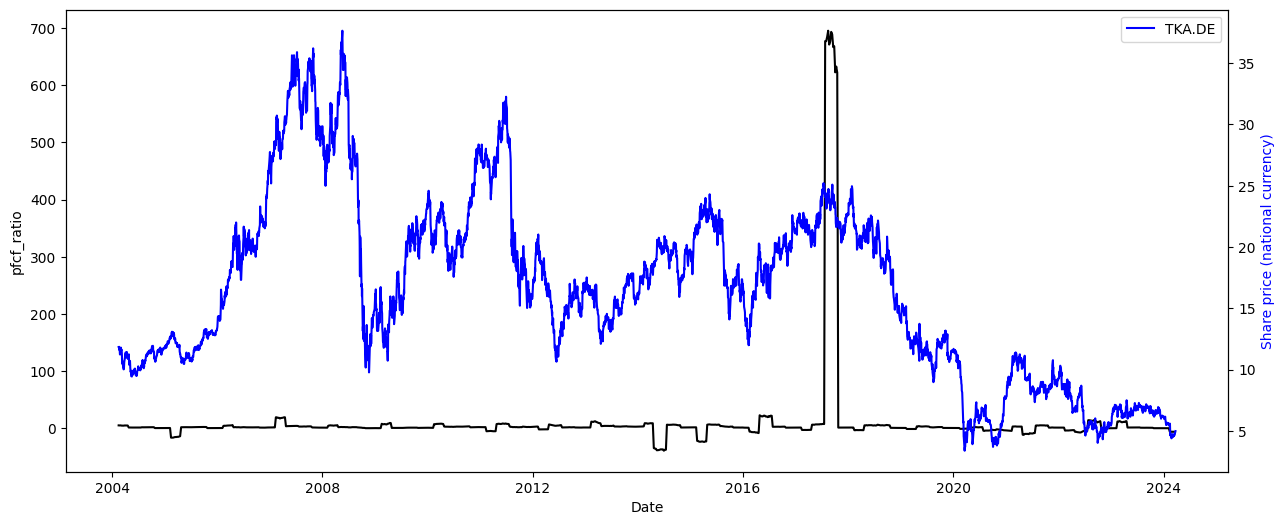

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

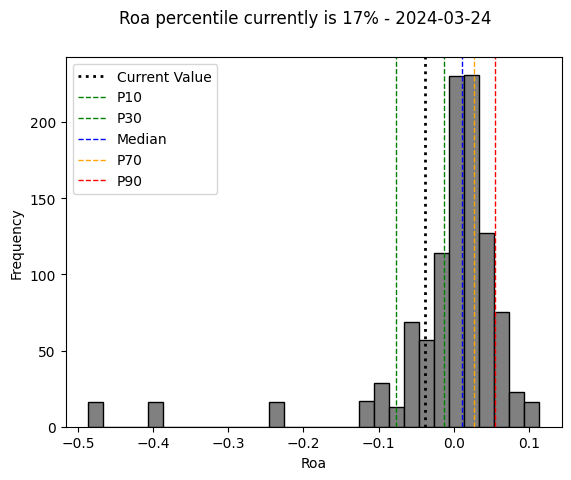

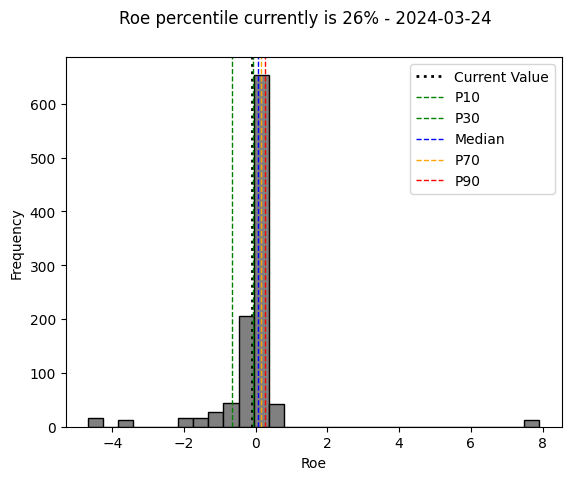

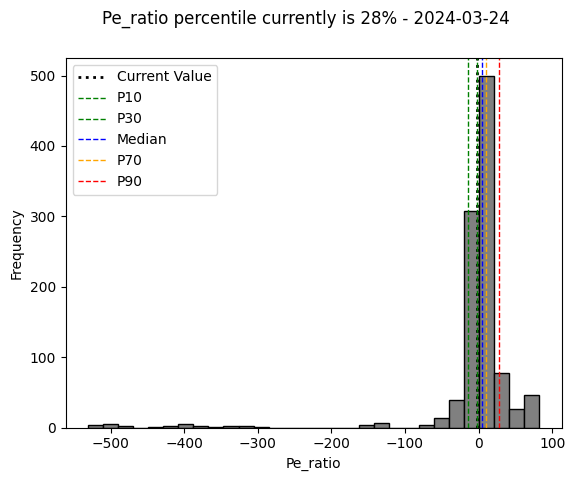

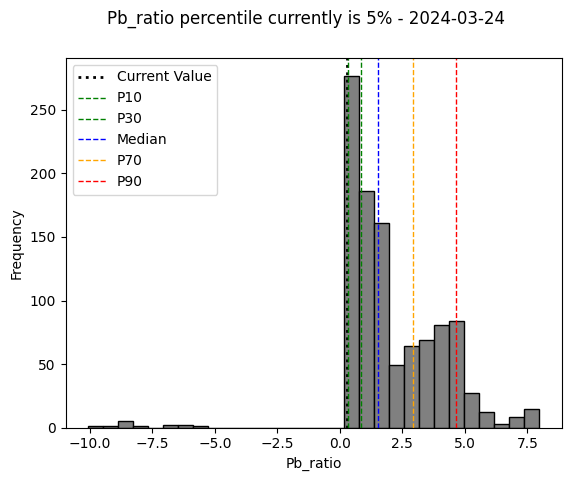

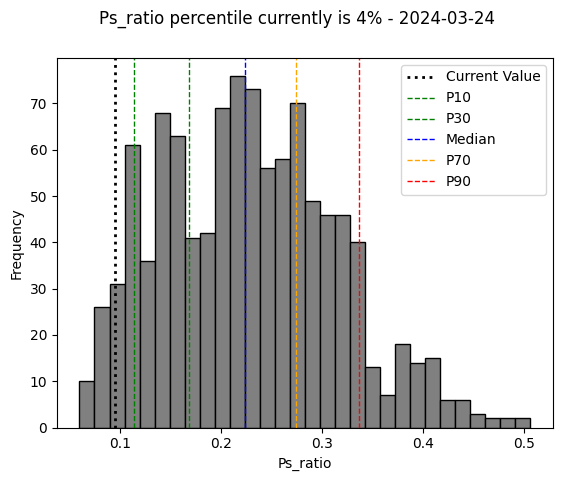

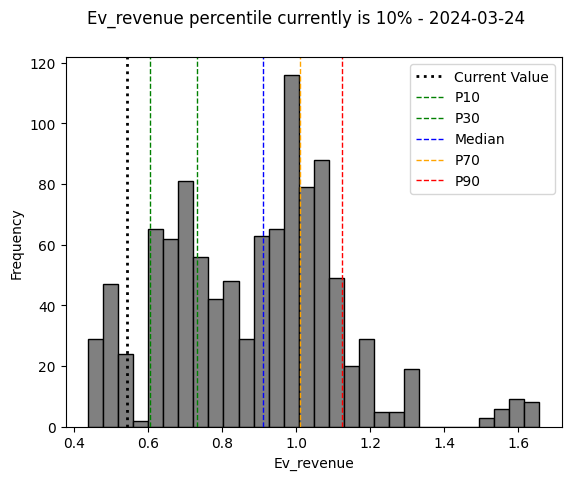

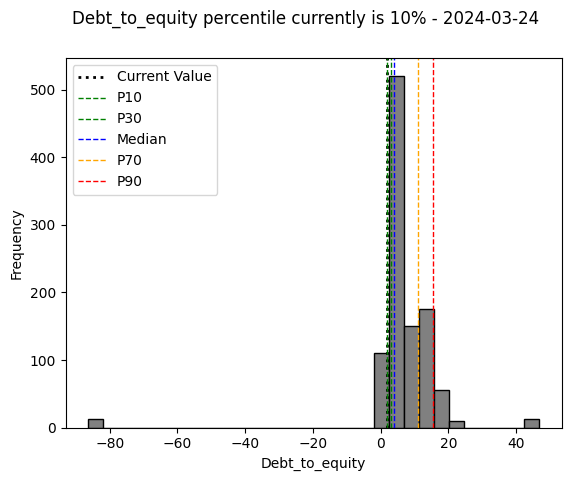

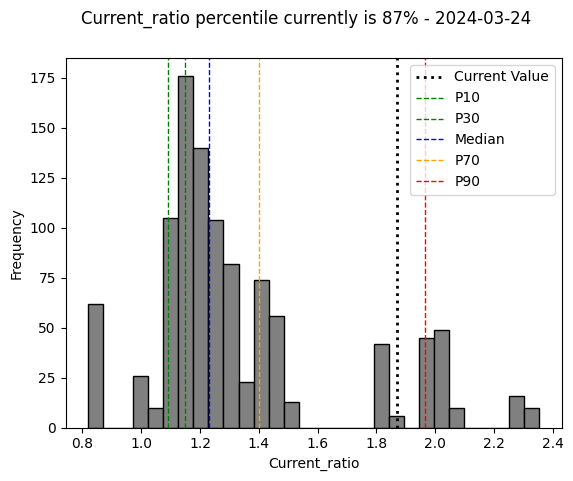

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.463677,0.029956,0.028125,0.145967,-0.064057,0.001763,-0.183413
roe,0.463677,1.000000,0.019571,-0.486137,0.033977,0.173607,-0.794730,-0.057331
pe_ratio,0.029956,0.019571,1.000000,-0.069336,-0.012782,-0.027968,-0.042005,0.065982
pb_ratio,0.028125,-0.486137,-0.069336,1.000000,0.569678,0.401014,0.812820,-0.335442
ps_ratio,0.145967,0.033977,-0.012782,0.569678,1.000000,0.662960,0.195356,-0.340024
ev_revenue,-0.064057,0.173607,-0.027968,0.401014,0.662960,1.000000,0.029432,-0.547291
debt_to_equity,0.001763,-0.794730,-0.042005,0.812820,0.195356,0.029432,1.000000,-0.144420
current_ratio,-0.183413,-0.057331,0.065982,-0.335442,-0.340024,-0.547291,-0.144420,1.000000


0 timestemos have been found!


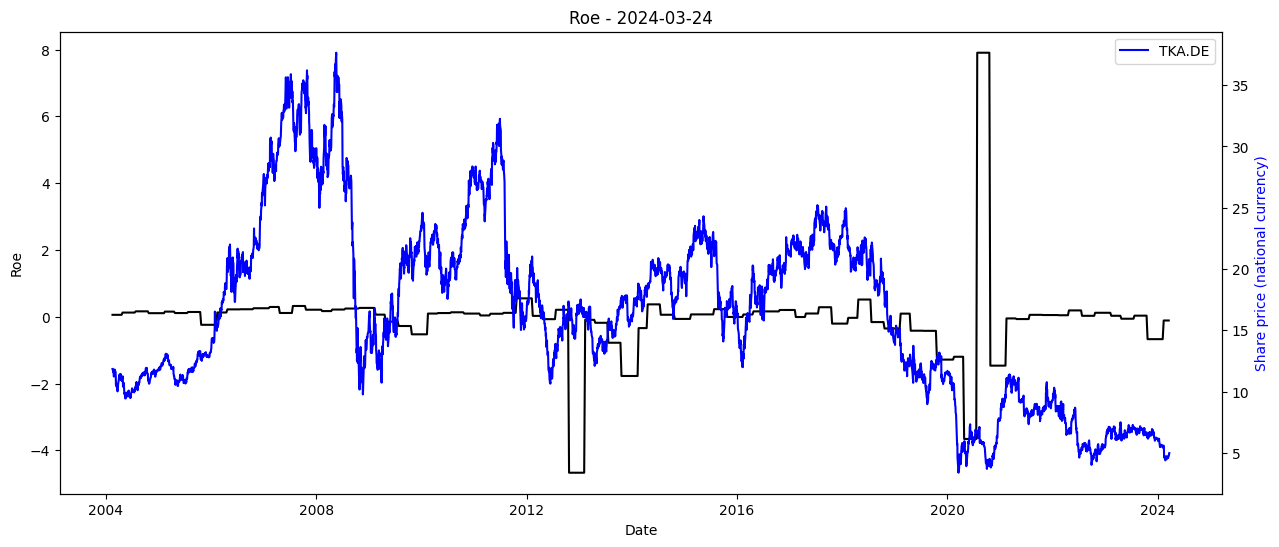

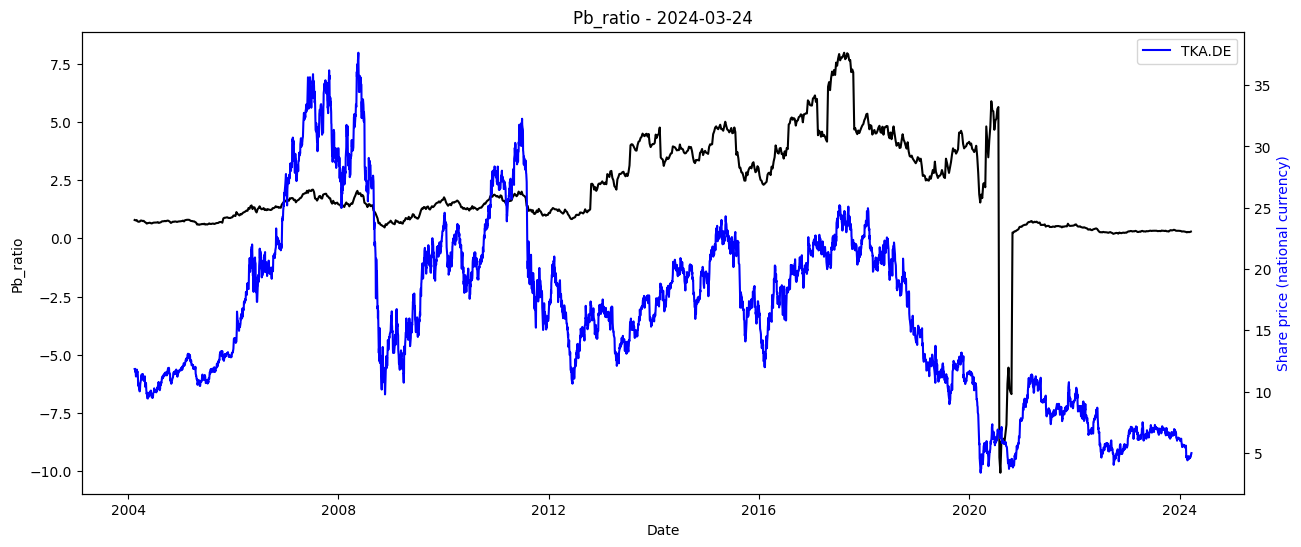

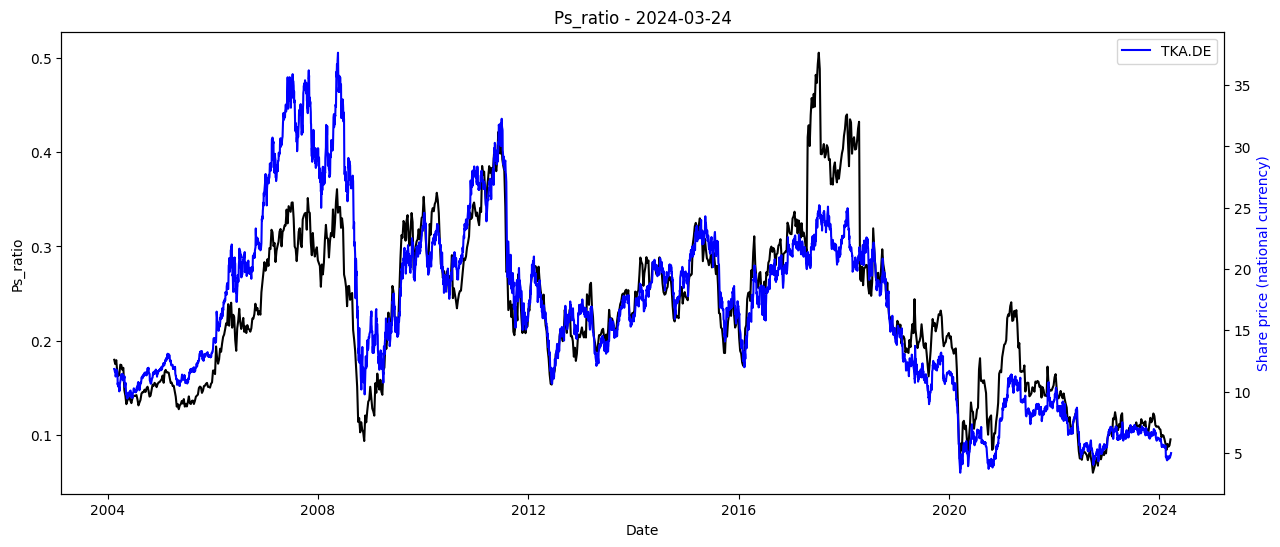

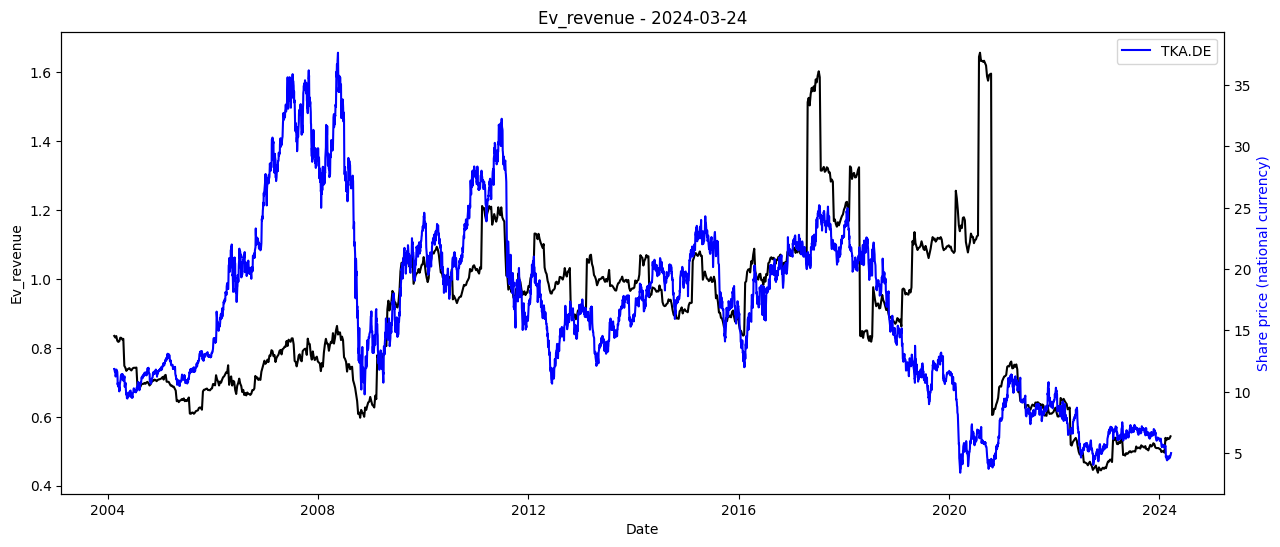

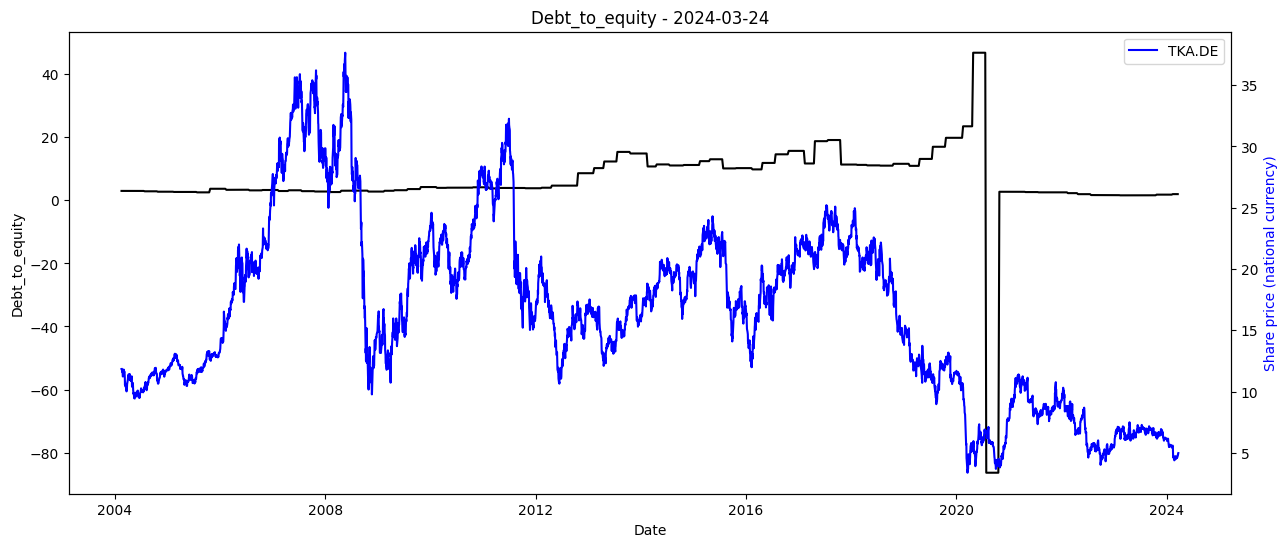

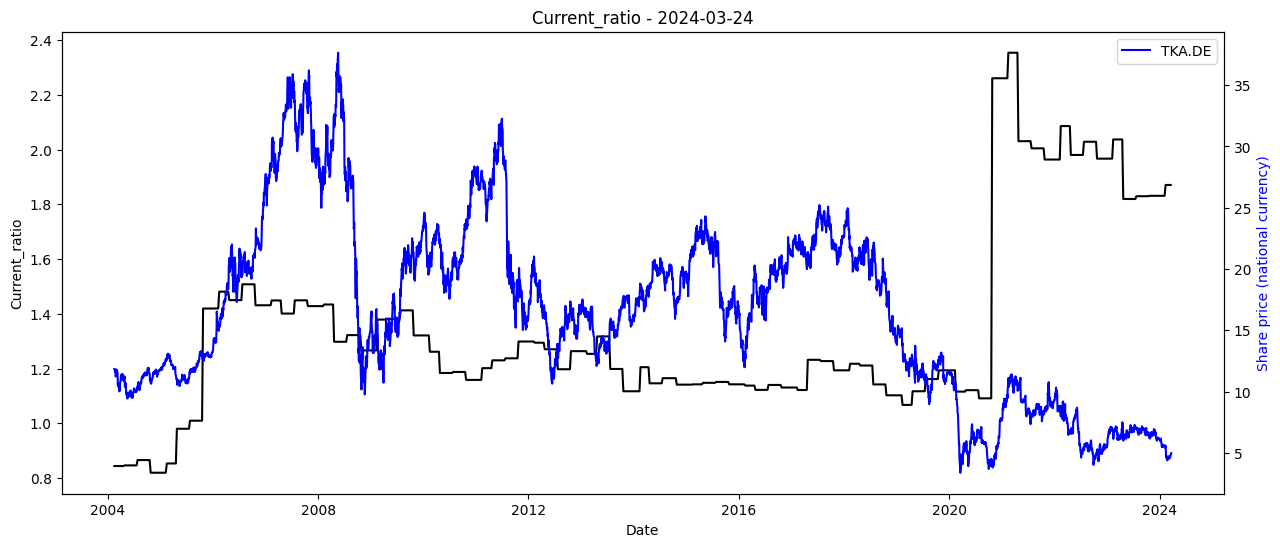

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )